In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
assert tf.test.is_built_with_cuda()
assert tf.config.list_physical_devices('GPU')

In [2]:
TRAINING_DIR = "aaa/second/train/"
VALIDATION_DIR = "aaa/second/val/"

BATCH_SIZE = 16

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, 
    target_size=(224,224), 
    color_mode='rgb',
    shuffle=True,
    class_mode="categorical",
    batch_size=BATCH_SIZE)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, 
    target_size=(224,224), 
    color_mode='rgb',
    shuffle=True,
    class_mode="categorical",
    batch_size=BATCH_SIZE)

Found 121 images belonging to 11 classes.
Found 58 images belonging to 11 classes.


In [3]:
from collections import Counter

counter = Counter(train_generator.classes)

numberClasses = len(counter.items())
print(counter.items())
print(numberClasses)

dict_items([(0, 10), (1, 10), (2, 9), (3, 12), (4, 5), (5, 7), (6, 6), (7, 6), (8, 11), (9, 5), (10, 40)])
11


In [4]:
from keras.optimizers import Adam
# Base on VGG16 but no 5th Conv layer and Dense drop to 2048 because limit memory
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(numberClasses, activation='softmax'))

epochs = 1250
lrate = 0.00001
decay = lrate/epochs
model.compile(optimizer=Adam(learning_rate=lrate), 
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                        

In [6]:
from keras.callbacks import ModelCheckpoint
callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=10),
    ModelCheckpoint(filepath='FaceClassify_FINAL.h5'),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

# hist = model.fit(x=train_generator, validation_data=validation_generator, epochs=20, batch_size=BATCH_SIZE, verbose=1, callbacks=callbacks)
hist = model.fit(x=train_generator, validation_data=validation_generator, epochs=epochs, batch_size=BATCH_SIZE, callbacks=callbacks)

Epoch 1/1250
8/8 [==============================] - 30s 2s/step - loss: 2.3923 - accuracy: 0.1983 - val_loss: 2.3936 - val_accuracy: 0.2759
Epoch 2/1250
8/8 [==============================] - 7s 832ms/step - loss: 2.3676 - accuracy: 0.3306 - val_loss: 2.3860 - val_accuracy: 0.2759
Epoch 3/1250
8/8 [==============================] - 7s 858ms/step - loss: 2.3210 - accuracy: 0.3306 - val_loss: 2.3648 - val_accuracy: 0.2759
Epoch 4/1250
8/8 [==============================] - 6s 708ms/step - loss: 2.2507 - accuracy: 0.3306 - val_loss: 2.3137 - val_accuracy: 0.2759
Epoch 5/1250
8/8 [==============================] - 5s 611ms/step - loss: 2.2071 - accuracy: 0.3306 - val_loss: 2.2975 - val_accuracy: 0.2759
Epoch 6/1250
8/8 [==============================] - 4s 527ms/step - loss: 2.1861 - accuracy: 0.3306 - val_loss: 2.2998 - val_accuracy: 0.2759
Epoch 7/1250
8/8 [==============================] - 4s 524ms/step - loss: 2.1996 - accuracy: 0.3306 - val_loss: 2.3148 - val_accuracy: 0.2759
Epoch 8/

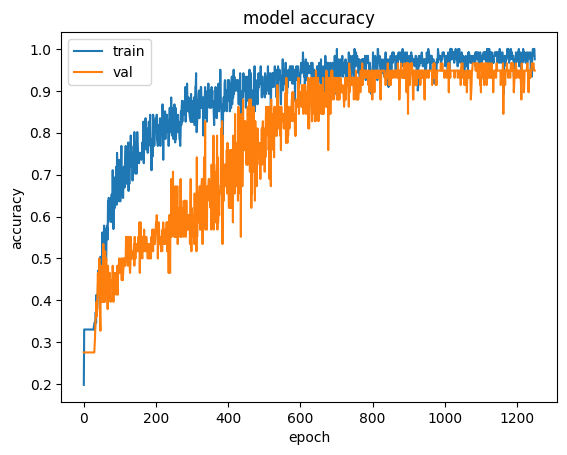

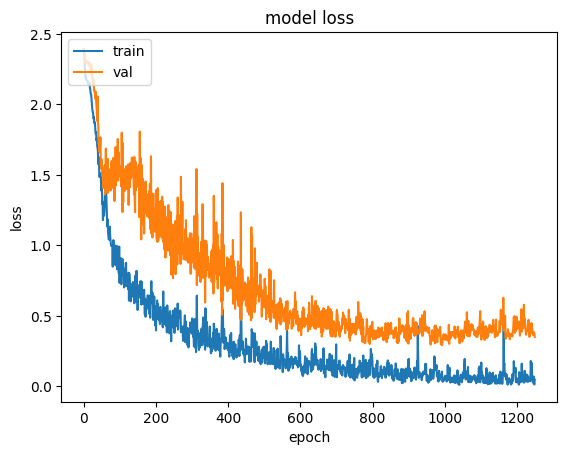

In [7]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('accuracy.png')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('loss.png')
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('FaceClassify_REMASTER_93_18.h5', compile=False)

In [8]:
best_model_accuracy = hist.history['accuracy'][np.argmin(hist.history['loss'])]
print(best_model_accuracy)
best_model_val_accuracy = hist.history['val_accuracy'][np.argmin(hist.history['val_loss'])]
print(best_model_val_accuracy)
print(np.min(hist.history['val_loss']))

1.0
0.9482758641242981
0.29273465275764465


In [ ]:
img, label = validation_generator.next()
predi = model.predict(img)
label = np.argmax(label, axis=1)
print(np.argmax(predi[0]) == label[0])

In [ ]:
import keras.models
model = keras.models.load_model('FaceClassify_FINAL.h5', compile=False)

Testing the model

In [9]:
TEST_DIR = "resource/second/test/"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR, 
    target_size=(224,224), 
    color_mode='rgb',
    shuffle=True,
    class_mode="categorical",
    batch_size=1)

Found 182 images belonging to 11 classes.


In [10]:
score = model.evaluate(test_generator)

182/182 [==============================] - 6s 25ms/step - loss: 0.2246 - accuracy: 0.9396


In [25]:
import cv2
import numpy as np
import os
img = cv2.imread("resource/second/test/")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
imr = cv2
img = img * 1. / 255
img = np.array([img])

mypath = 'resource/second/train/'
labels = os.listdir(mypath)

print(labels[np.argmax(model.predict(img)[0])])

1/1 [==============================] - 0s 22ms/step
VuNgocTu


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[0])
plt.show()